# Heart Disease Prediction using Neural Networks 

In [126]:
import sys
import pandas as pd
import numpy as np
import sklearn
import keras
import wfdb
import ast

In [127]:
import matplotlib.pyplot as plt

### 1. Importing the Dataset

The dataset is available through the University of California, Irvine Machine learning repository. Here is the URL:

http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. To data, all published studies using this data focus on a subset of 14 attributes - so we will do the same. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

To import the necessary data, we will use pandas' built in read_csv() function. Let's get started!

In [128]:
# import the heart disease dataset
url = "ptbxl_database.csv"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'height',
        'weight',
        'device'
]

# read the csv
# cleveland = pd.read_csv(url, names=names)
cleveland = pd.read_csv(url)

In [129]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(cleveland.shape')
print (cleveland.loc[1])

format(cleveland.shape
ecg_id                                                            2
patient_id                                                  13243.0
age                                                            19.0
sex                                                               0
height                                                          NaN
weight                                                         70.0
nurse                                                           2.0
site                                                            0.0
device                                                    CS-12   E
recording_date                                  1984-11-14 12:55:37
report                          sinusbradykardie sonst normales ekg
scp_codes                              {'NORM': 80.0, 'SBRAD': 0.0}
heart_axis                                                      NaN
infarction_stadium1                                             NaN
infarction_stadium2      

In [130]:
# print the last twenty or so data points
cleveland.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [131]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.head()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [132]:
# drop rows with NaN values from DataFrame
# data = data.dropna(axis=0)
# data.loc[280:]

In [133]:
# print the shape and data type of the dataframe
print (data.shape)
print (data.dtypes)

(21799, 28)
ecg_id                            int64
patient_id                      float64
age                             float64
sex                               int64
height                          float64
weight                          float64
nurse                           float64
site                            float64
device                           object
recording_date                   object
report                           object
scp_codes                        object
heart_axis                       object
infarction_stadium1              object
infarction_stadium2              object
validated_by                    float64
second_opinion                     bool
initial_autogenerated_report       bool
validated_by_human                 bool
baseline_drift                   object
static_noise                     object
burst_noise                      object
electrodes_problems              object
extra_beats                      object
pacemaker                   

In [134]:
# transform data to numeric to enable further analysis
# data = data.apply(pd.to_numeric)
# data.dtypes

In [135]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,ecg_id,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,10926.658379,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6302.393366,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,1.000000,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5469.500000,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,10926.000000,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16386.500000,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21837.000000,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


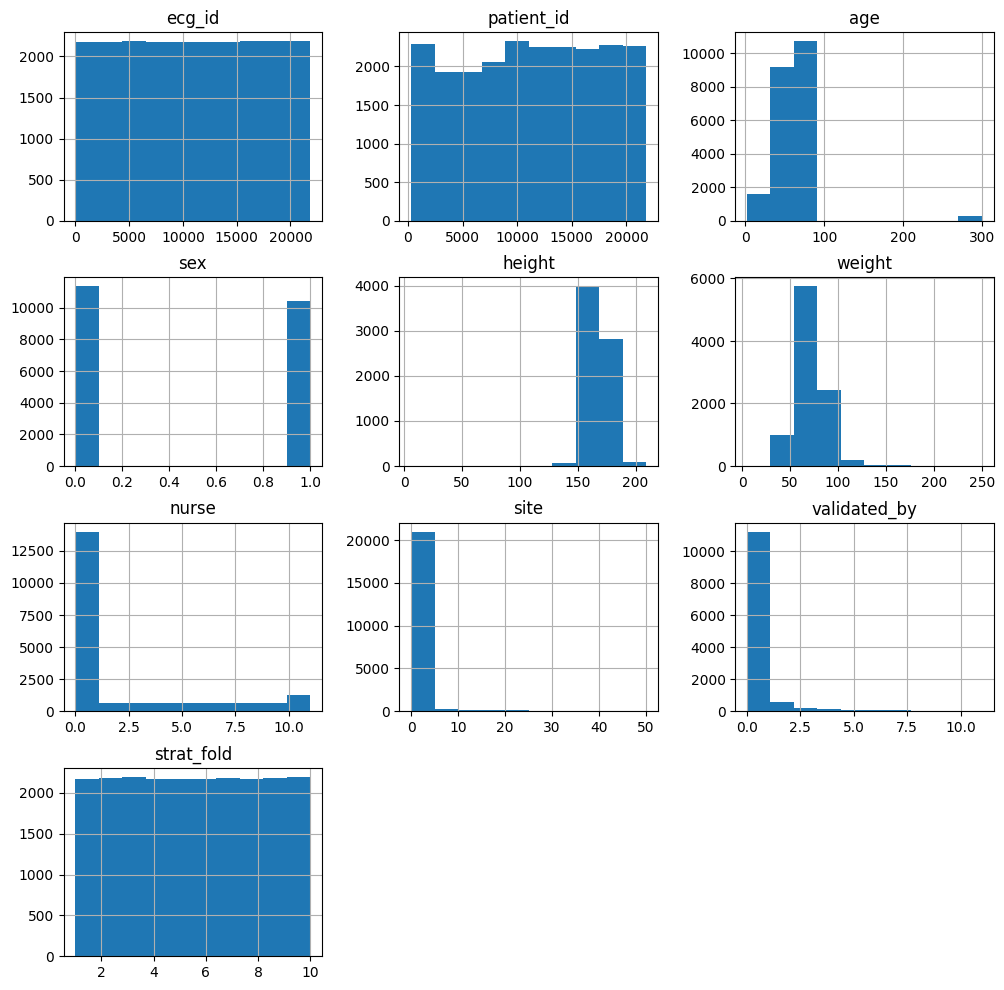

In [136]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

Furthermore, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0]. 

In [137]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(columns=['class'], axis=1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

KeyError: "['class'] not found in axis"

In [ ]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


### 3. Building and Training the Neural Network

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\DmytroMykhailiuk\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [2]:
import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt

def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

path = './'
sampling_rate=100
nrows=1000 # number of patients to load, set to None to load all patients

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id', nrows=nrows)
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
Y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
Y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass

## Analyse the data

In [3]:
print(X_train)
print(Y_train)

[[[-1.190e-01 -5.500e-02  6.400e-02 ... -2.600e-02 -3.900e-02 -7.900e-02]
  [-1.160e-01 -5.100e-02  6.500e-02 ... -3.100e-02 -3.400e-02 -7.400e-02]
  [-1.200e-01 -4.400e-02  7.600e-02 ... -2.800e-02 -2.900e-02 -6.900e-02]
  ...
  [ 6.900e-02  0.000e+00 -6.900e-02 ...  2.400e-02 -4.100e-02 -5.800e-02]
  [ 8.600e-02  4.000e-03 -8.100e-02 ...  2.420e-01 -4.600e-02 -9.800e-02]
  [ 2.200e-02 -3.100e-02 -5.400e-02 ...  1.430e-01 -3.500e-02 -1.200e-01]]

 [[ 4.000e-03  1.380e-01  1.340e-01 ...  1.920e-01  8.300e-02  8.800e-02]
  [-2.000e-02  1.160e-01  1.360e-01 ...  1.560e-01  5.700e-02  6.300e-02]
  [-5.300e-02  9.200e-02  1.450e-01 ...  1.070e-01  1.300e-02  2.200e-02]
  ...
  [ 1.210e-01  3.980e-01  2.770e-01 ... -1.065e+00 -4.920e-01 -1.560e-01]
  [-3.260e-01  5.700e-02  3.830e-01 ... -2.800e-01 -1.750e-01 -7.100e-02]
  [-3.480e-01 -5.600e-02  2.920e-01 ... -3.080e-01 -2.310e-01 -1.450e-01]]

 [[-2.900e-02 -7.900e-02 -4.900e-02 ... -1.030e-01 -7.600e-02 -6.600e-02]
  [-3.500e-02 -7.000e-

In [ ]:
print(X_test)
print(Y_test)

[[[-0.145 -0.097  0.049 ... -0.452 -0.269 -0.032]
  [-0.115 -0.083  0.032 ... -0.339 -0.246 -0.041]
  [-0.064 -0.06   0.005 ... -0.188 -0.199 -0.04 ]
  ...
  [ 0.23   0.292  0.063 ...  0.443  0.362  0.222]
  [ 0.251  0.319  0.067 ...  0.498  0.405  0.261]
  [ 0.338  0.361  0.023 ...  0.515  0.447  0.299]]

 [[ 0.182  0.196  0.013 ...  0.413  0.279  0.284]
  [ 0.23   0.309  0.079 ...  0.524  0.4    0.402]
  [ 0.125 -0.092 -0.217 ... -0.002  0.022  0.181]
  ...
  [-0.076 -0.085 -0.009 ... -0.02  -0.01   0.032]
  [-0.048 -0.067 -0.019 ...  0.007  0.002  0.008]
  [-0.04  -0.053 -0.013 ...  0.032  0.022  0.015]]

 [[ 0.036  0.025 -0.011 ...  0.082  0.067 -0.014]
  [ 0.054  0.044 -0.01  ...  0.11   0.091  0.003]
  [ 0.095  0.09  -0.005 ...  0.143  0.123  0.035]
  ...
  [-0.261 -0.018  0.242 ... -0.039 -0.066 -0.082]
  [-0.049 -0.039  0.01  ... -0.043 -0.064 -0.2  ]
  [ 0.071 -0.047 -0.118 ... -0.049 -0.067 -0.082]]]
ecg_id
9     [NORM]
38    [NORM]
40    [NORM]
Name: diagnostic_superclass, d

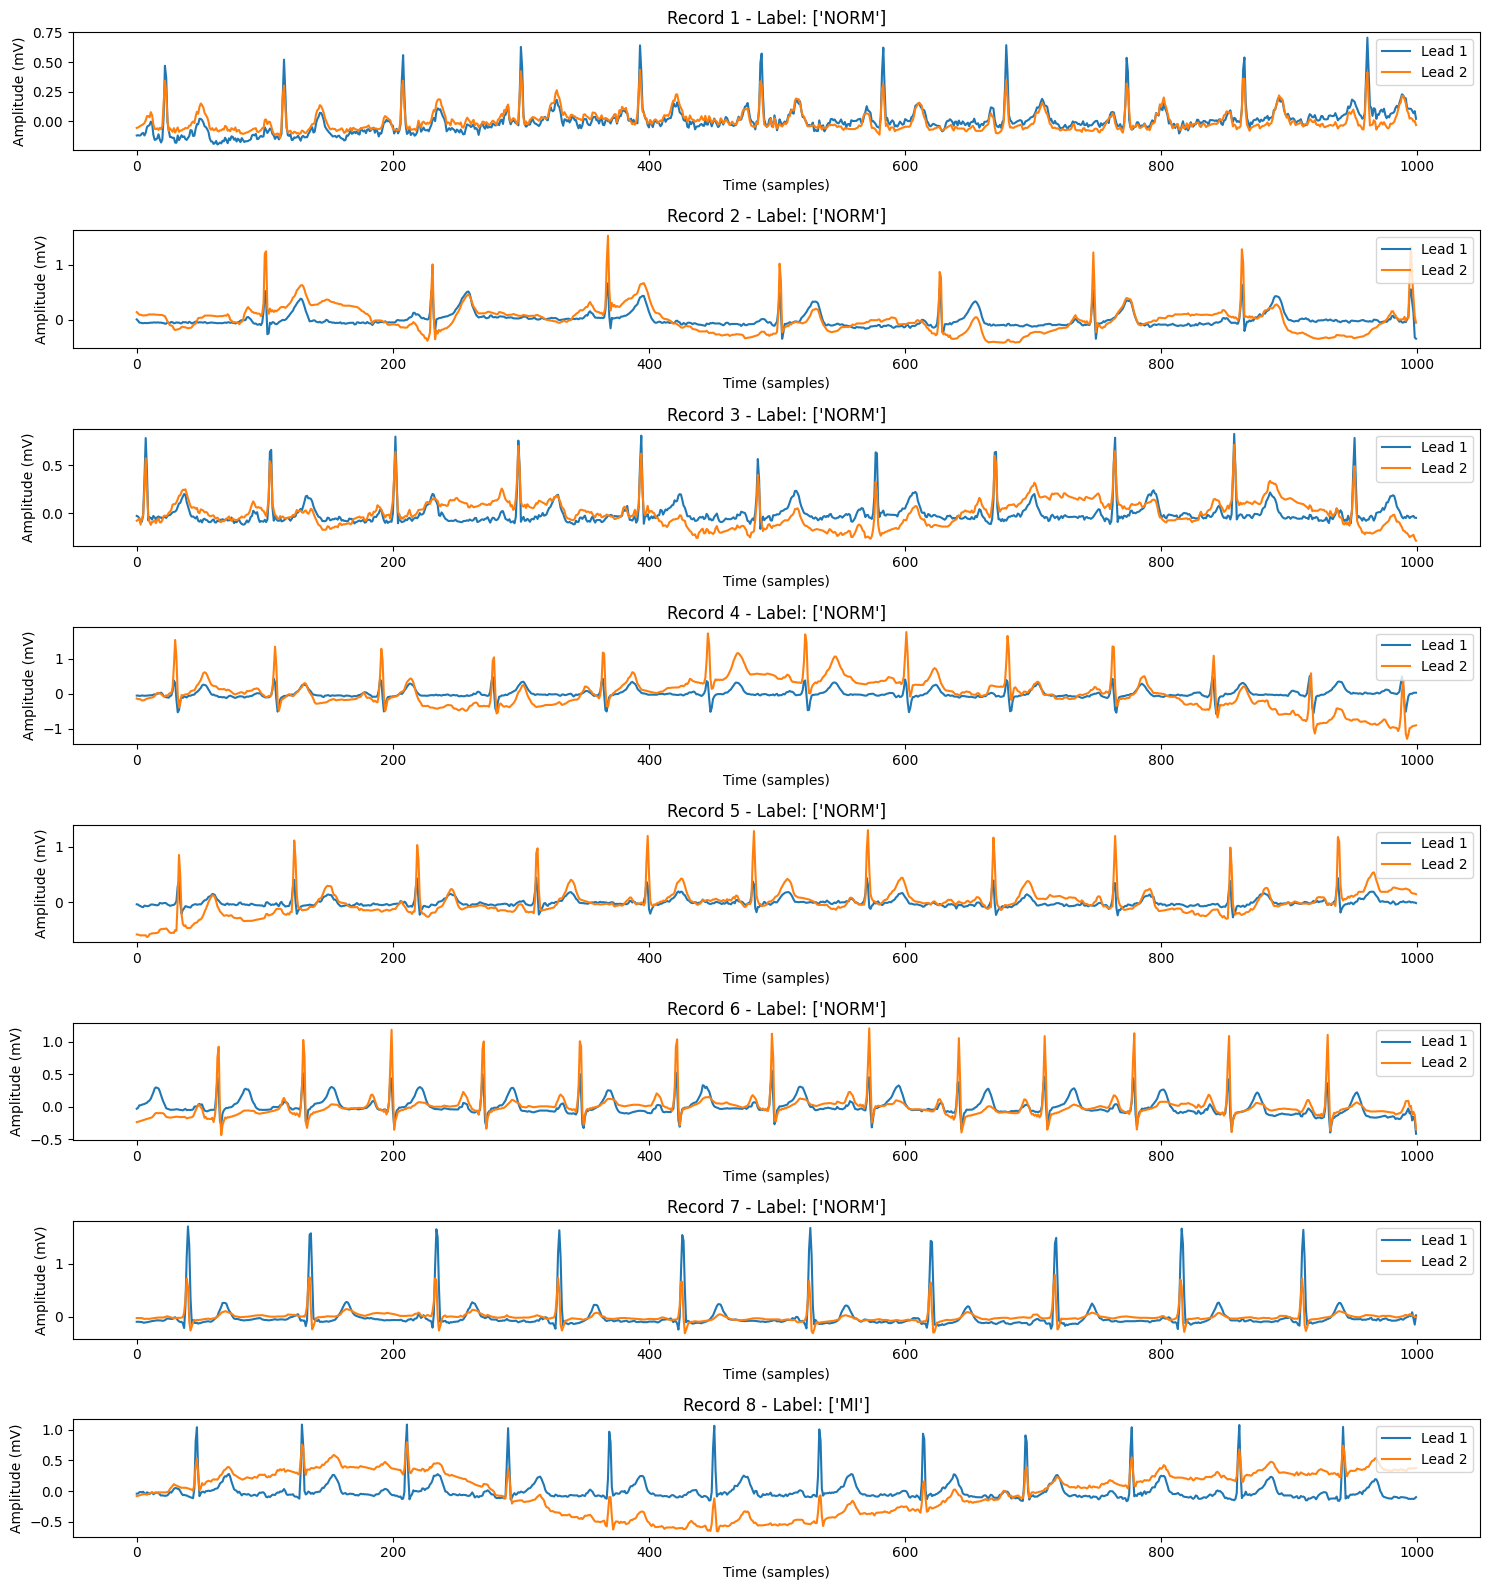

In [ ]:
num_records = 8
num_leads = 2 # maximal is 12

plt.figure(figsize=(15, num_records * 2))
for i in range(num_records):
    plt.subplot(num_records, 1, i + 1)
    for j in range(num_leads):  # Loop through each lead
        plt.plot(X_train[i][:, j], label=f'Lead {j+1}')
    plt.title(f'Record {i+1} - Label: {Y_train.iloc[i]}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude (mV)')
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Step 1: Preprocess the Data

### Encoding Labels
Use one-hot encoding for the labels:

In [4]:
# Flatten lists to single string labels
Y_train = Y_train.apply(lambda x: x[0] if x else 'UNKNOWN')
Y_test = Y_test.apply(lambda x: x[0] if x else 'UNKNOWN')

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert Y_train and Y_test into numerical labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

In [182]:
# Convert to one-hot encoding
Y_train_onehot = np.eye(len(np.unique(Y_train_encoded)))[Y_train_encoded]
Y_test_onehot = np.eye(len(np.unique(Y_test_encoded)))[Y_test_encoded]

### Normalizing Input Data

In [183]:
from sklearn.preprocessing import StandardScaler

# Reshape X_train and X_test to 2D for scaling if necessary
scaler = StandardScaler()
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # Flatten for scaling
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(X_train.shape)

X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])  # Flatten for scaling
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test.shape)

### Step 2: Build the Neural Network Model

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(Y_train_onehot.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Step 3: Train the Model


In [185]:
# Train the model
history = model.fit(X_train_scaled, Y_train_onehot, epochs=30, batch_size=32, 
                    validation_data=(X_test_scaled, Y_test_onehot))

Epoch 1/30
28/28 [==============================] - 34s 1s/step - loss: 1.5919 - accuracy: 0.3823 - val_loss: 1.3984 - val_accuracy: 0.4806
Epoch 2/30
28/28 [==============================] - 30s 1s/step - loss: 1.3069 - accuracy: 0.5189 - val_loss: 1.3579 - val_accuracy: 0.4806
Epoch 3/30
28/28 [==============================] - 39s 1s/step - loss: 1.3019 - accuracy: 0.5121 - val_loss: 1.3448 - val_accuracy: 0.4884
Epoch 4/30
28/28 [==============================] - 37s 1s/step - loss: 1.2467 - accuracy: 0.5396 - val_loss: 1.3178 - val_accuracy: 0.5039
Epoch 5/30
28/28 [==============================] - 34s 1s/step - loss: 1.2080 - accuracy: 0.5431 - val_loss: 1.3112 - val_accuracy: 0.4961
Epoch 6/30
28/28 [==============================] - 36s 1s/step - loss: 1.1945 - accuracy: 0.5591 - val_loss: 1.3140 - val_accuracy: 0.5271
Epoch 7/30
28/28 [==============================] - 33s 1s/step - loss: 1.1504 - accuracy: 0.5614 - val_loss: 1.3147 - val_accuracy: 0.5194
Epoch 8/30
28/28 [==

### Step 4: Evaluate the Model


In [186]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test_onehot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 1s 241ms/step - loss: 1.3338 - accuracy: 0.5891
Test Loss: 1.3338496685028076
Test Accuracy: 0.5891472697257996


### Step 5: Make Predictions


In [187]:
# Predict classes
predictions = model.predict(X_test_scaled)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

5/5 [==============================] - 2s 220ms/step


In [189]:
predicted_labels

array(['NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM',
       'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM',
       'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'CD', 'STTC', 'CD',
       'NORM', 'STTC', 'NORM', 'CD', 'NORM', 'NORM', 'NORM', 'NORM',
       'NORM', 'STTC', 'NORM', 'NORM', 'STTC', 'NORM', 'STTC', 'CD',
       'STTC', 'NORM', 'STTC', 'UNKNOWN', 'CD', 'NORM', 'NORM', 'NORM',
       'NORM', 'CD', 'STTC', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM',
       'NORM', 'NORM', 'NORM', 'STTC', 'CD', 'MI', 'NORM', 'NORM', 'STTC',
       'NORM', 'UNKNOWN', 'NORM', 'STTC', 'CD', 'STTC', 'NORM', 'NORM',
       'STTC', 'CD', 'NORM', 'STTC', 'MI', 'NORM', 'NORM', 'UNKNOWN',
       'NORM', 'CD', 'NORM', 'NORM', 'STTC', 'NORM', 'STTC', 'CD', 'NORM',
       'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM',
       'MI', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'CD', 'NORM',
       'NORM', 'NORM', 'CD', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM

Optional: Model Tuning and Optimization

Adjust Hyperparameters: Experiment with the number of layers, neurons, dropout rates, etc.

Cross-Validation: Consider cross-validating for more reliable performance metrics.

Try Other Models: Consider 1D CNN layers, which often perform well on time-series data like HRV.

In [ ]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

### 4. Improving Results - A Binary Classification Problem

Although we achieved promising results, we still have a fairly large error. This could be because it is very difficult to distinguish between the different severity levels of heart disease (classes 1 - 4). Let's simplify the problem by converting the data to a binary classification problem - heart disease or no heart disease.

In [26]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1]


In [27]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
237/237 [==============================] - 1s 3ms/step - loss: 0.7204 - accuracy: 0.5612
Epoch 2/100
237/237 [==============================] - 0s 354us/step - loss: 0.6801 - accuracy: 0.5781
Epoch 3/100
237/237 [==============================] - 0s 388us/step - loss: 0.6782 - accuracy: 0.6118
Epoch 4/100
237/237 [==============================] - 0s 219us/step - loss: 0.6739 - accuracy: 0.6371
Epoch 5/100
237/237 [==============================] - 0s 219us/step - loss: 0.6405 - accuracy: 0.6287
Epoch 6/100
237/237 [==============================] - 0s 186us/step - loss: 0.6310 - accuracy: 0.6456
Epoch 7/100
237/237 [==============================] - 0s 202us/step - loss: 0.6023 - accuracy: 0.7595
Epoch 8/100
237/237 [==============================] - 0s 202us/step - loss: 0.5834 - accuracy: 0.7553
Epoch 9/100
237/237 [==============================] - 0s 219us/step - loss: 0.5740 - accuracy: 0.7131
Epoch 10/100
237/237 [==============================] - 0s 186us/step - los

237/237 [==============================] - 0s 321us/step - loss: 0.3584 - accuracy: 0.8692
Epoch 80/100
237/237 [==============================] - 0s 219us/step - loss: 0.3630 - accuracy: 0.8439
Epoch 81/100
237/237 [==============================] - 0s 202us/step - loss: 0.3670 - accuracy: 0.8439
Epoch 82/100
237/237 [==============================] - 0s 202us/step - loss: 0.3623 - accuracy: 0.8439
Epoch 83/100
237/237 [==============================] - 0s 186us/step - loss: 0.3584 - accuracy: 0.8608
Epoch 84/100
237/237 [==============================] - 0s 202us/step - loss: 0.3776 - accuracy: 0.8312
Epoch 85/100
237/237 [==============================] - 0s 186us/step - loss: 0.3639 - accuracy: 0.8608
Epoch 86/100
237/237 [==============================] - 0s 193us/step - loss: 0.3618 - accuracy: 0.8397
Epoch 87/100
237/237 [==============================] - 0s 194us/step - loss: 0.3549 - accuracy: 0.8692
Epoch 88/100
237/237 [==============================] - 0s 177us/step - loss:

### 5. Results and Metrics

The accuracy results we have been seeing are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility. 

Let's test the performance of both our categorical model and binary model.  To do this, we will make predictions on the training dataset and calculate performance metrics using Sklearn.

In [29]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        36
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         6
           3       0.35      1.00      0.52         6
           4       0.00      0.00      0.00         1

    accuracy                           0.67        60
   macro avg       0.30      0.40      0.31        60
weighted avg       0.59      0.67      0.60        60



E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.7833333333333333
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60

